# Alcohol

## reference

In [822]:
# https://www.kaggle.com/datasets/whenamancodes/alcohol-effects-on-study

## Import Libraries

In [823]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier,  BaggingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
from sklearn.utils import resample

## Import Data

In [824]:
path1 = 'https://raw.githubusercontent.com/notfakearcher/julian/main/02_data/portuguese.csv'
path2 = 'https://raw.githubusercontent.com/notfakearcher/julian/main/02_data/maths.csv'
portuguese = pd.read_csv(path1)
math = pd.read_csv(path2)

In [825]:
portuguese.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [826]:
math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## join the two data together

In [827]:
m,n = math.shape
m1,n1 = portuguese.shape

#  add each subject to each profile 
subject = ['math']*m
math['subject'] = subject

subject1 = ['portuguese']*m1
portuguese['subject'] = subject1

# join the two dataframe together
p_m = pd.concat([math, portuguese])
p_m

# shuffle all rows in the pM dataframe
p_m = p_m.sample(frac = 1).reset_index(drop = 'index')
p_m

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,M,18,U,LE3,T,4,3,teacher,services,...,2,3,1,2,1,0,10,10,10,portuguese
1,GP,M,17,U,GT3,T,3,2,services,services,...,5,5,2,4,5,2,8,8,7,portuguese
2,GP,M,16,R,GT3,T,4,3,services,other,...,3,3,1,1,4,6,9,11,11,portuguese
3,GP,M,16,U,LE3,T,2,1,other,other,...,2,3,1,2,5,0,13,14,16,portuguese
4,GP,F,16,U,GT3,T,3,1,services,other,...,3,3,1,2,5,0,10,9,10,portuguese
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,15,R,LE3,T,1,1,at_home,other,...,2,1,1,3,4,0,9,10,9,portuguese
1040,GP,M,15,U,LE3,T,4,4,teacher,other,...,4,3,2,4,5,8,10,11,11,portuguese
1041,GP,M,16,R,GT3,T,2,1,other,other,...,3,2,1,3,3,0,8,9,8,math
1042,GP,M,16,U,GT3,T,4,4,services,teacher,...,4,3,1,1,4,0,16,17,17,math


## Split variables and targets

In [828]:
cond1 = p_m.columns == 'G1'
cond2 = p_m.columns == 'G2'
cond3 = p_m.columns == 'G3'
v_n = p_m.columns[~cond1 & ~cond2 & ~cond3] 
X = p_m[v_n]

In [829]:
y_name = ['G3']
y = p_m[y_name]
y
# reset labels for y 
labels = np.sort(y['G3'].unique())
labels = {labels[i] : i for i in range(len(labels))}
y = y['G3'].replace(labels)
y = np.ravel(y)

## change type in X

In [830]:
# initialize the label encoder for non-numerical conversions
le = LabelEncoder()

# random forest can't cope with string, convert string to int category
X = X.copy()
cols = X.select_dtypes('object').columns
X[cols] = X.select_dtypes('object').apply(le.fit_transform)
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,subject
0,0,1,18,1,1,1,4,3,4,3,...,1,0,4,2,3,1,2,1,0,1
1,0,1,17,1,0,1,3,2,3,3,...,1,0,5,5,5,2,4,5,2,1
2,0,1,16,0,0,1,4,3,3,2,...,1,0,3,3,3,1,1,4,6,1
3,0,1,16,1,1,1,2,1,2,2,...,1,1,4,2,3,1,2,5,0,1
4,0,0,16,1,0,1,3,1,3,2,...,1,0,4,3,3,1,2,5,0,1


In [831]:
# combine dataframes together

# approach 1: 
df_alcohol = X.copy()
df_alcohol['y'] = y
df_alcohol

# approach 2: 
# df_alcohol = X.assign(y = y)
# df_alcohol

# approach 3: 
# y = pd.DataFrame({'y': y})
# df_alcohol = pd.concat([X, y], axis = 1)
# df_alcohol


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,subject,y
0,0,1,18,1,1,1,4,3,4,3,...,0,4,2,3,1,2,1,0,1,8
1,0,1,17,1,0,1,3,2,3,3,...,0,5,5,5,2,4,5,2,1,5
2,0,1,16,0,0,1,4,3,3,2,...,0,3,3,3,1,1,4,6,1,9
3,0,1,16,1,1,1,2,1,2,2,...,1,4,2,3,1,2,5,0,1,14
4,0,0,16,1,0,1,3,1,3,2,...,0,4,3,3,1,2,5,0,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1,0,15,0,1,1,1,1,0,2,...,1,5,2,1,1,3,4,0,1,7
1040,0,1,15,1,1,1,4,4,4,2,...,1,5,4,3,2,4,5,8,1,9
1041,0,1,16,0,0,1,2,1,2,2,...,0,3,3,2,1,3,3,0,0,6
1042,0,1,16,1,0,1,4,4,3,4,...,1,4,4,3,1,1,4,0,0,15


## Visual

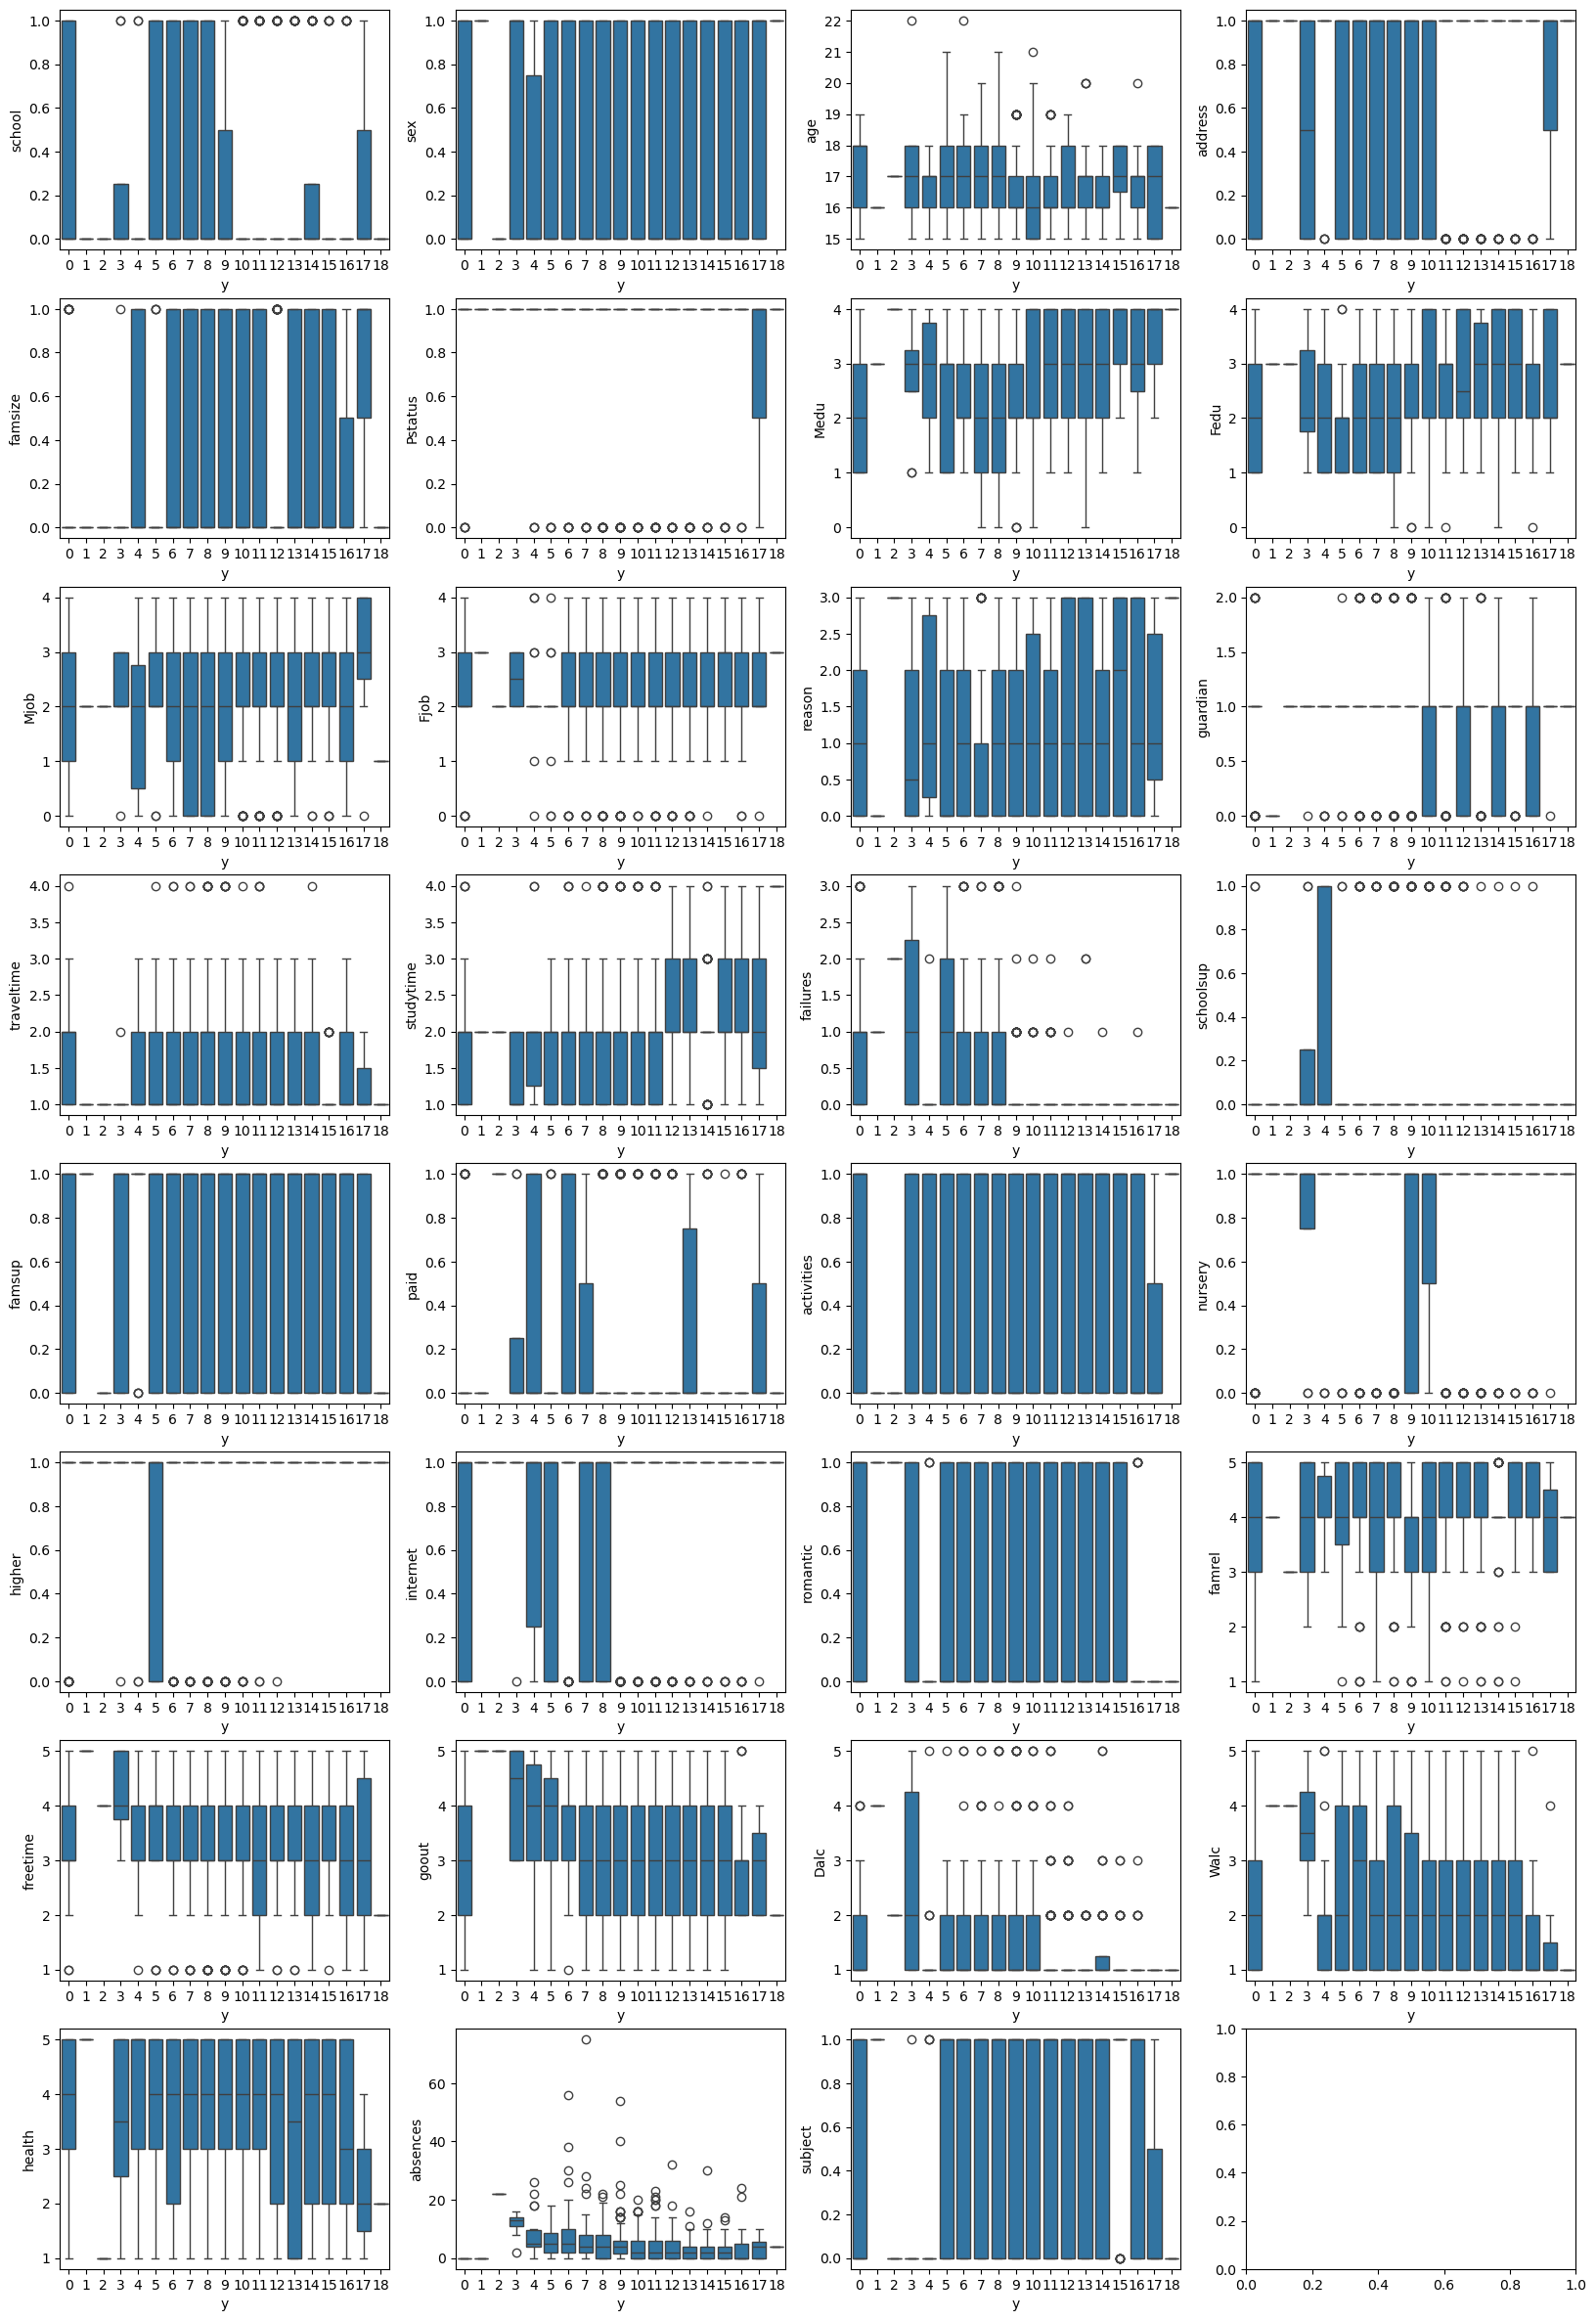

In [832]:
X_row, X_col = X.shape
n_row = 8
n_col = 4
figsize = (20,30)
fig , axs = plt.subplots(nrows = n_row, ncols = n_col, figsize = figsize)

# plot each X
i = 0
for X_col in X.columns:
  row_i = int(i/4)
  col_i = i - (row_i * 4)
  sns.boxplot(ax = axs[row_i, col_i], data = df_alcohol, y = X_col , x = 'y')
  i = i + 1
  
plt.show()


## Balance the labels

In [861]:
# copy original dataframe
df_alcohol_2 = df_alcohol.copy()
# labels vs count
label_count = df_alcohol_2['y'].value_counts()
# max count of the labels
max_label_count = df_alcohol_2['y'].value_counts().max()
# upsample needed for each labels
upsample_n = max_label_count - label_count
# get rid of the 0
upsample_n = upsample_n[upsample_n != 0].sort_index()
# for each y label
for i in upsample_n.index:
  cond = df_alcohol_2['y'] == i
  df_temp = df_alcohol_2.loc[cond,:]
  # resample dataframe
  y_upsample_n = upsample_n[i]
  df_addition = resample(df_temp, replace = True, n_samples = y_upsample_n)
  # join the upsample to exist dataframe
  df_alcohol_2 = pd.concat([df_alcohol_2, df_addition],axis = 0, ignore_index = True)

df_alcohol_2.y.value_counts()

8     153
11    153
2     153
1     153
17    153
3     153
4     153
16    153
15    153
7     153
5     153
13    153
6     153
12    153
0     153
10    153
14    153
9     153
18    153
Name: y, dtype: int64

In [862]:
# standardize x values
df_alcohol_3 = df_alcohol_2.copy()
cond = df_alcohol_3.columns == 'y'
non_y = df_alcohol_3.columns[~cond]
object = StandardScaler()
df_alcohol_3[non_y] = object.fit_transform(df_alcohol_3[non_y])
df_alcohol_3.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,subject,y
0,-0.530265,1.042527,0.998474,0.542495,1.777301,0.340486,1.036424,0.478229,1.662328,0.753043,...,-0.781933,0.118553,-1.184206,-0.266137,-0.591921,-0.283833,-1.543097,-0.771443,0.981931,8
1,-0.530265,1.042527,0.215901,0.542495,-0.562651,0.340486,0.134363,-0.456053,0.806432,0.753043,...,-0.781933,1.223153,1.534262,1.340634,0.348360,1.181712,1.066054,-0.482989,0.981931,5
2,-0.530265,1.042527,-0.566672,-1.843334,-0.562651,0.340486,1.036424,0.478229,0.806432,-0.420106,...,-0.781933,-0.986046,-0.278050,-0.266137,-0.591921,-1.016605,0.413766,0.093919,0.981931,9
3,-0.530265,1.042527,-0.566672,0.542495,1.777301,0.340486,-0.767699,-1.390336,-0.049464,-0.420106,...,1.278882,0.118553,-1.184206,-0.266137,-0.591921,-0.283833,1.066054,-0.771443,0.981931,14
4,-0.530265,-0.959208,-0.566672,0.542495,-0.562651,0.340486,0.134363,-1.390336,0.806432,-0.420106,...,-0.781933,0.118553,-0.278050,-0.266137,-0.591921,-0.283833,1.066054,-0.771443,0.981931,8


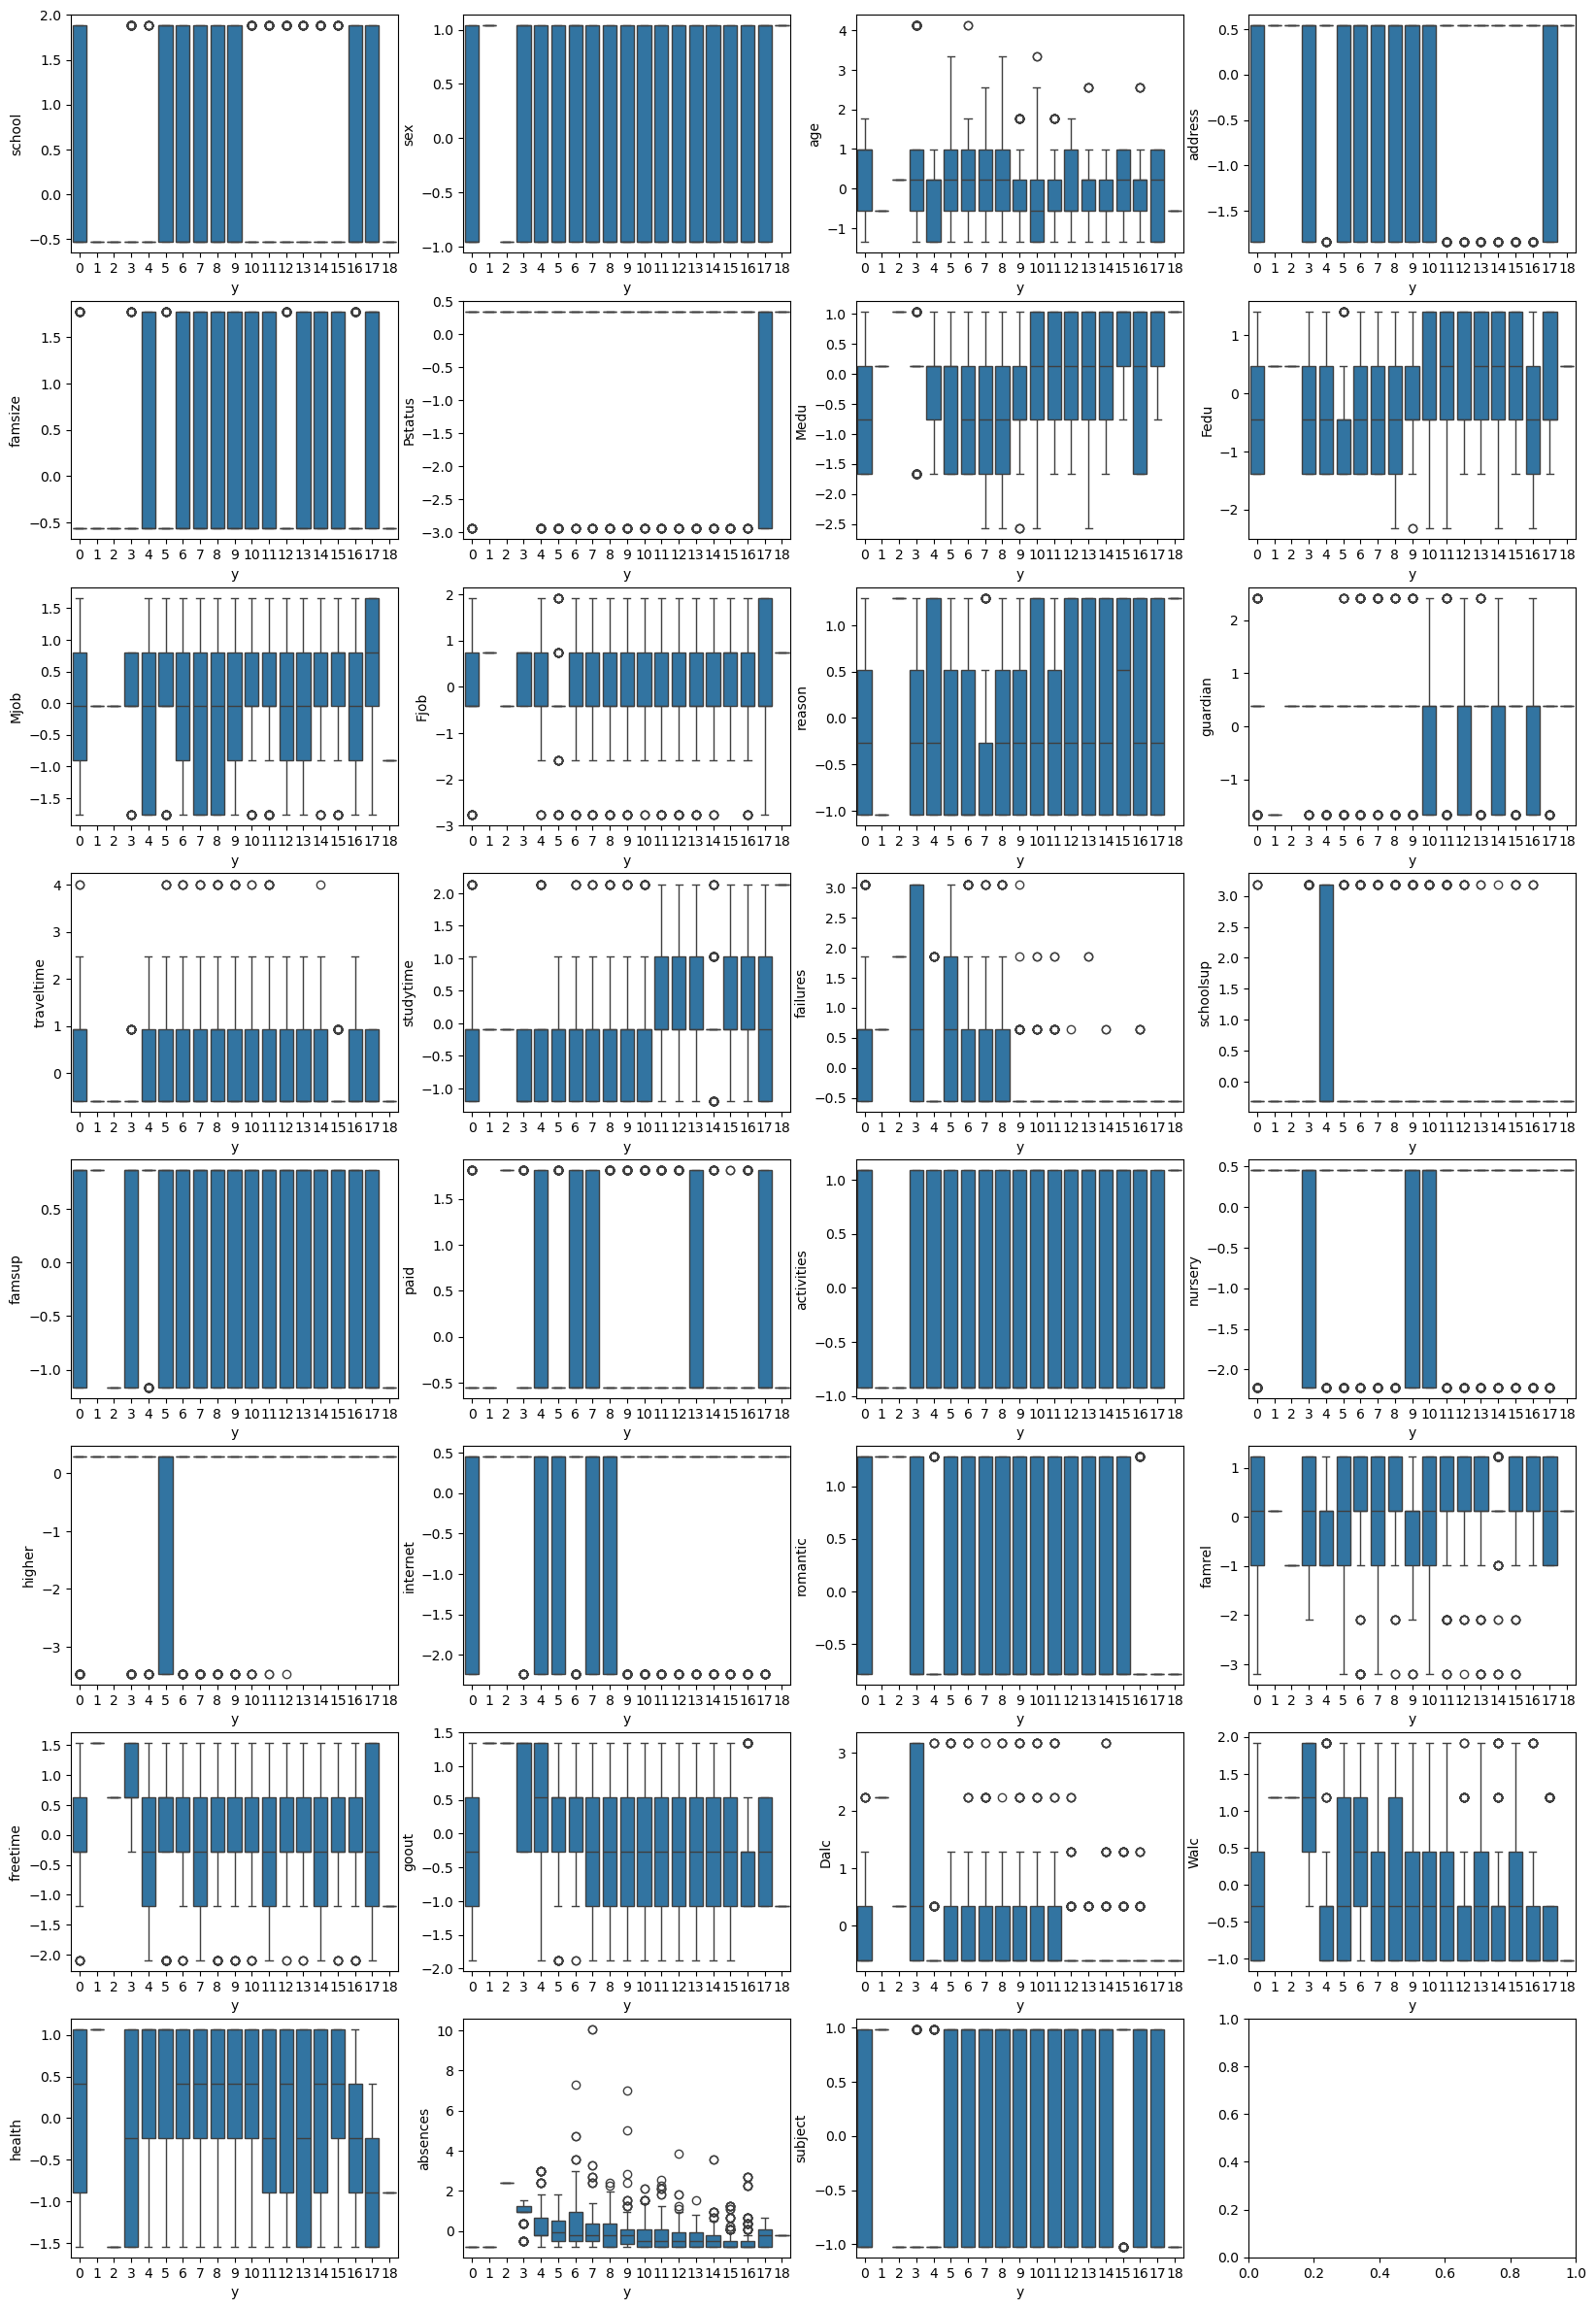

In [863]:
X_row, X_col = X.shape
n_row = 8
n_col = 4
figsize = (20,30)
fig , axs = plt.subplots(nrows = n_row, ncols = n_col, figsize = figsize)

# plot each X
i = 0
for X_col in X.columns:
  row_i = int(i/4)
  col_i = i - (row_i * 4)
  sns.boxplot(ax = axs[row_i, col_i], data = df_alcohol_3, y = X_col , x = 'y')
  i = i + 1
  
plt.show()


## Split the data into training and test

In [865]:
X = df_alcohol_3[X.columns]
y = df_alcohol_3['y']

In [866]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7)

## Feature selection

In [867]:
# random forest to select features
rf = RandomForestClassifier(n_estimators = 10, criterion = 'gini')
model = SelectFromModel(rf.fit(X_train, y_train))

In [868]:
model.get_support()

array([False, False,  True, False, False, False,  True,  True,  True,
        True,  True, False, False,  True,  True, False, False, False,
       False, False, False, False, False,  True,  True,  True, False,
        True,  True,  True,  True])

In [869]:
# important features
important_f = X_train.columns[model.get_support()]

## Remove unimportant features

In [870]:
X1_train = X_train[important_f]
y1_train = y_train
X1_test = X_test[important_f]
y1_test = y_test

## Bagging 

In [871]:
model1 = BaggingClassifier()
# model1.fit(X1_train, y1_train['G1'])

In [872]:
# model1.fit(X1_train, y1_train['G2'])

In [873]:
model1.fit(X1_train, y1_train)

BaggingClassifier()

In [874]:
# predict the lables for test
y_pred = model1.predict(X1_test)

## confusion metrics

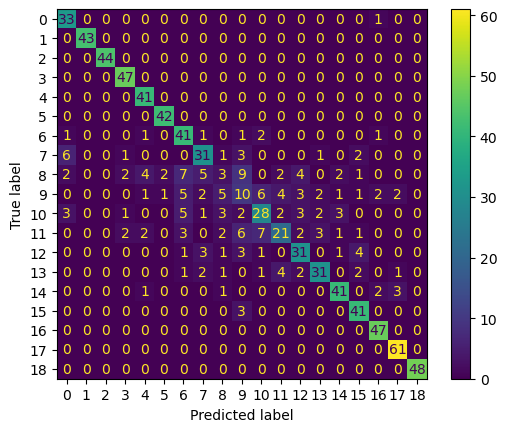

In [875]:
cm = confusion_matrix(y1_test, y_pred)
dis = ConfusionMatrixDisplay(cm)
dis.plot()
plt.show()

## Accuracy

In [876]:
print(classification_report(y1_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.97      0.84        34
           1       1.00      1.00      1.00        43
           2       1.00      1.00      1.00        44
           3       0.89      1.00      0.94        47
           4       0.82      1.00      0.90        41
           5       0.93      1.00      0.97        42
           6       0.65      0.85      0.74        48
           7       0.69      0.69      0.69        45
           8       0.18      0.07      0.10        43
           9       0.27      0.22      0.24        45
          10       0.62      0.53      0.57        53
          11       0.64      0.42      0.51        50
          12       0.69      0.69      0.69        45
          13       0.79      0.69      0.74        45
          14       0.84      0.85      0.85        48
          15       0.79      0.93      0.85        44
          16       0.89      1.00      0.94        47
          17       0.91    

## DEcision Tree

In [877]:
model2 = DecisionTreeClassifier(criterion ='gini', splitter = 'best')
model2.fit(X1_train, y1_train)

DecisionTreeClassifier()

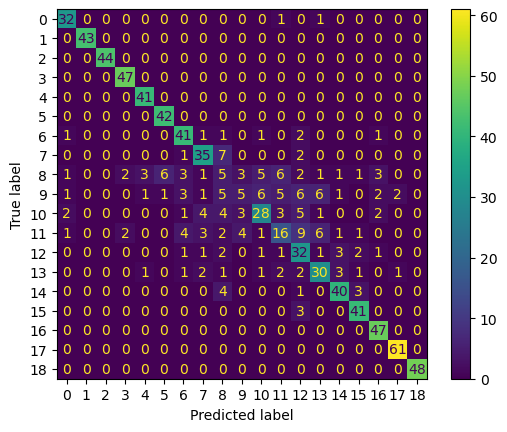

In [878]:
y_pred = model2.predict(X1_test)
dis2 = ConfusionMatrixDisplay(confusion_matrix(y1_test, y_pred))
dis2.plot()

## Accuracy

In [879]:
print(classification_report(y1_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89        34
           1       1.00      1.00      1.00        43
           2       1.00      1.00      1.00        44
           3       0.92      1.00      0.96        47
           4       0.89      1.00      0.94        41
           5       0.86      1.00      0.92        42
           6       0.75      0.85      0.80        48
           7       0.73      0.78      0.75        45
           8       0.16      0.12      0.14        43
           9       0.33      0.11      0.17        45
          10       0.65      0.53      0.58        53
          11       0.47      0.32      0.38        50
          12       0.50      0.71      0.59        45
          13       0.65      0.67      0.66        45
          14       0.82      0.83      0.82        48
          15       0.84      0.93      0.88        44
          16       0.84      1.00      0.91        47
          17       0.95    